# 주식 비교하기
---

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


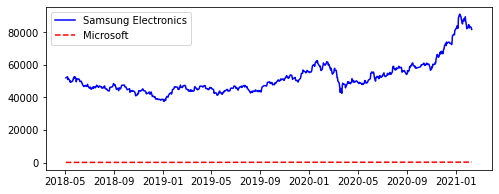

In [24]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

# sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04', end='2019-09-06')
# msft = pdr.get_data_yahoo('MSFT', start='2018-05-04', end='2019-09-06')

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

# 일간 변동률
---
일간 변동률을 이용하면, 가격이 다른 두 주가의 수익률을 비교할 수 있다.

$$R_{t}(오늘 변동률) = \Bigg(\frac{R_{t}(오늘 종가) - R_{t-1}(어제 종가)}{R_{t-1}(어제종가)}\Bigg) \times 100$$

In [2]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-02-04    82500.0
2021-02-05    83500.0
2021-02-08    83000.0
2021-02-09    82700.0
2021-02-10    81600.0
Name: Close, Length: 680, dtype: float64

In [3]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-02-04    84600.0
2021-02-05    82500.0
2021-02-08    83500.0
2021-02-09    83000.0
2021-02-10    82700.0
Name: Close, Length: 680, dtype: float64

In [4]:
sec_dpc = (sec.Close / sec.Close.shift(1) - 1) * 100
sec_dpc.iloc[0] = 0

In [5]:
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [6]:
msft_dpc = (msft.Close / msft.Close.shift(1) - 1) * 100
msft_dpc.iloc[0] = 0

In [7]:
msft_dpc.head()

Date
2018-05-04    0.000000
2018-05-07    1.113911
2018-05-08   -0.426111
2018-05-09    1.179423
2018-05-10    1.000620
Name: Close, dtype: float64

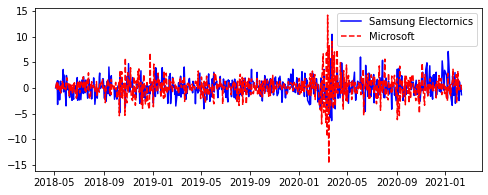

In [8]:
plt.figure(figsize=(8, 3))
plt.plot(sec_dpc.index, sec_dpc.values, 'b', label='Samsung Electornics')
plt.plot(msft_dpc.index, msft_dpc.values, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

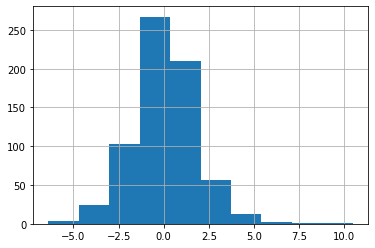

In [9]:
plt.hist(sec_dpc, bins=10)
plt.grid(True)
plt.show()

In [10]:
sec_dpc.describe()

count    680.000000
mean       0.082297
std        1.779208
min       -6.387665
25%       -0.997182
50%        0.104056
75%        1.066690
max       10.470588
Name: Close, dtype: float64

In [11]:
sec_dpc_cs = sec_dpc.cumsum()
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-02-04    57.040506
2021-02-05    58.252627
2021-02-08    57.653825
2021-02-09    57.292379
2021-02-10    55.962270
Name: Close, Length: 680, dtype: float64

In [12]:
msft_dpc_cs = msft_dpc.cumsum()
msft_dpc_cs

Date
2018-05-04      0.000000
2018-05-07      1.113911
2018-05-08      0.687800
2018-05-09      1.867223
2018-05-10      2.867843
                 ...    
2021-02-04    107.801124
2021-02-05    107.879635
2021-02-08    107.991114
2021-02-09    108.527265
2021-02-10    108.137554
Name: Close, Length: 698, dtype: float64

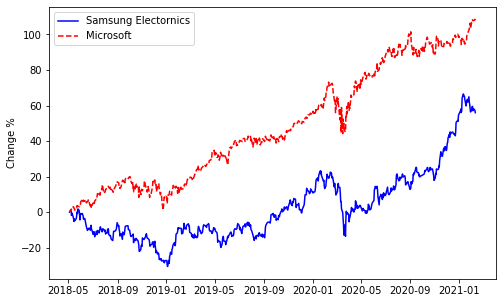

In [13]:
plt.figure(figsize=(8,5))
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electornics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.ylabel('Change %')
plt.show()

## 최대 손실 낙폭(MDD)
---
최대 손실 낙폭이란, 특정 기간동안 발생한 최고점과 최저점까지의 가장 큰 손실을 뜻한다. 퀀트 투자에서는 **수익률보다 MDD를 낮추는 것이 더 낫다**고 할 정도로 중요한 지표다. 특정 기간 동안 최대한 얼마의 손실이 날 수 있는지를 나타낸다.
$$MDD = \frac{최저점 - 최고점}{최저점}$$

### 코스피 MDD구하기
---

[*********************100%***********************]  1 of 1 completed


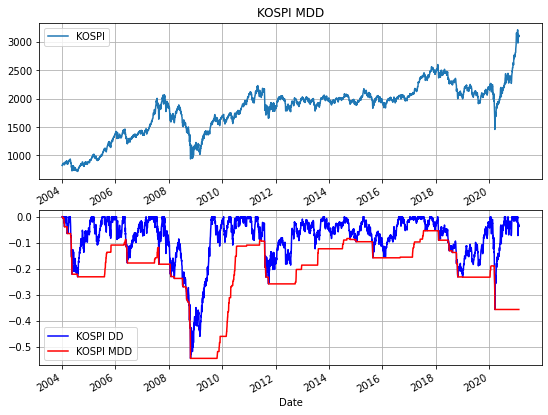

In [14]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [15]:
max_dd.min()

-0.5453665130144085

In [17]:
max_dd[max_dd == max_dd.min()]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

## KOSPI와 다우존스 지수 비교
---

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


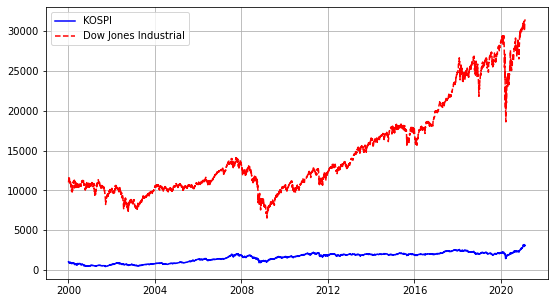

In [18]:
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

plt.figure(figsize=(9,5))
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.grid(True)
plt.legend(loc='best')
plt.show()

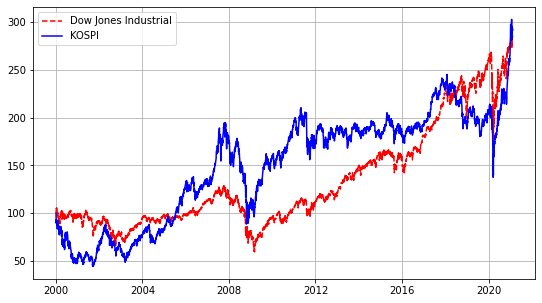

In [19]:
d = (dow.Close / dow.Close.loc['2000-01-04'])*100
k = (kospi.Close / kospi.Close.loc['2000-01-04'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [21]:
len(dow)

5310

In [22]:
len(kospi)

5204

In [25]:
df = pd.DataFrame({'Dow': dow.Close, 'KOSPI': kospi.Close})
df

,Dow,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2021-02-04,31055.859375,3087.550049
2021-02-05,31148.240234,3120.629883
2021-02-08,31385.759766,3091.239990


In [26]:
df = df.fillna(method='bfill')

In [28]:
df = df.fillna(method='ffill')

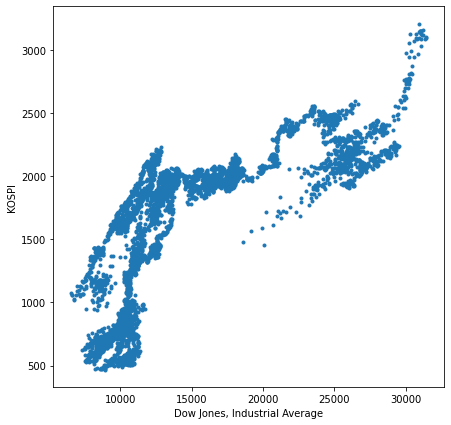

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(df['Dow'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones, Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [30]:
import scipy